In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [151]:
df = pd.read_csv('train.csv')    # Load the training data(it's actually train_df but since we're currently working with training data )

In [152]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [153]:
null_counts=df.isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)
sorted_null_counts

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageFinish       81
GarageType         81
GarageYrBlt        81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Condition2          0
BldgType            0
Neighborhood        0
LandSlope           0
LotConfig           0
Condition1          0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSSubClass          0
MSZoning            0
Id                  0
Utilities           0
HouseStyle          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodA

In [154]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [157]:
df.drop(columns=['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], inplace=True)

In [158]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [159]:
null_counts=df.isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)
sorted_null_counts

LotFrontage      259
GarageQual        81
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
Electrical         1
LandSlope          0
LotShape           0
Street             0
LotArea            0
MSZoning           0
MSSubClass         0
LotConfig          0
Utilities          0
LandContour        0
YearBuilt          0
YearRemodAdd       0
Condition2         0
Neighborhood       0
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
RoofStyle          0
RoofMatl           0
BsmtFinSF1         0
Foundation         0
BsmtFinSF2         0
BsmtUnfSF          0
Heating            0
Condition1         0
HouseStyle         0
OverallQual        0
OverallCond        0
BldgType           0
2ndFlrSF           0
1stFlrSF           0
CentralAir         0
HeatingQC          0
TotalBsmtSF        0
GrLivArea    

In [160]:
categorical_data=['MSZoning', 'Street',	'LotShape', 'LandContour',	'Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle', 'ExterQual',	'ExterCond',	'Foundation',	'BsmtQual',	'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'Heating',	'HeatingQC',	'CentralAir',	'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',	'GarageCond',	'PavedDrive','WoodDeckSF','OpenPorchSF',	'EnclosedPorch',	'3SsnPorch',	'ScreenPorch',	'PoolArea',	'MiscVal',	'MoSold',	'YrSold', 'SaleType',	'SaleCondition',  'RoofStyle',	'RoofMatl',	'Exterior1st',	'Exterior2nd']                                           
numerical_data=['MSSubClass', 'LotFrontage',	'LotArea', 'OverallQual',	'OverallCond',	'YearBuilt',	'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF',	'TotalBsmtSF', '1stFlrSF',	'2ndFlrSF',	'LowQualFinSF'	,'GrLivArea',	'BsmtFullBath',	'BsmtHalfBath',	'FullBath',	'HalfBath',	'BedroomAbvGr',	'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt','GarageCars', 'GarageArea']

In [161]:
import warnings
warnings.filterwarnings('ignore')
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [162]:
import warnings
warnings.filterwarnings('ignore')
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [163]:
num_df=df[numerical_data]
cat_df=df[categorical_data]

In [164]:
null_counts=df.isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)
sorted_null_counts

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [165]:
df[numerical_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1460 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   OverallQual   1460 non-null   int64  
 4   OverallCond   1460 non-null   int64  
 5   YearBuilt     1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   MasVnrArea    1460 non-null   float64
 8   BsmtFinSF1    1460 non-null   int64  
 9   BsmtFinSF2    1460 non-null   int64  
 10  BsmtUnfSF     1460 non-null   int64  
 11  TotalBsmtSF   1460 non-null   int64  
 12  1stFlrSF      1460 non-null   int64  
 13  2ndFlrSF      1460 non-null   int64  
 14  LowQualFinSF  1460 non-null   int64  
 15  GrLivArea     1460 non-null   int64  
 16  BsmtFullBath  1460 non-null   int64  
 17  BsmtHalfBath  1460 non-null   int64  
 18  FullBath      1460 non-null 

<Axes: >

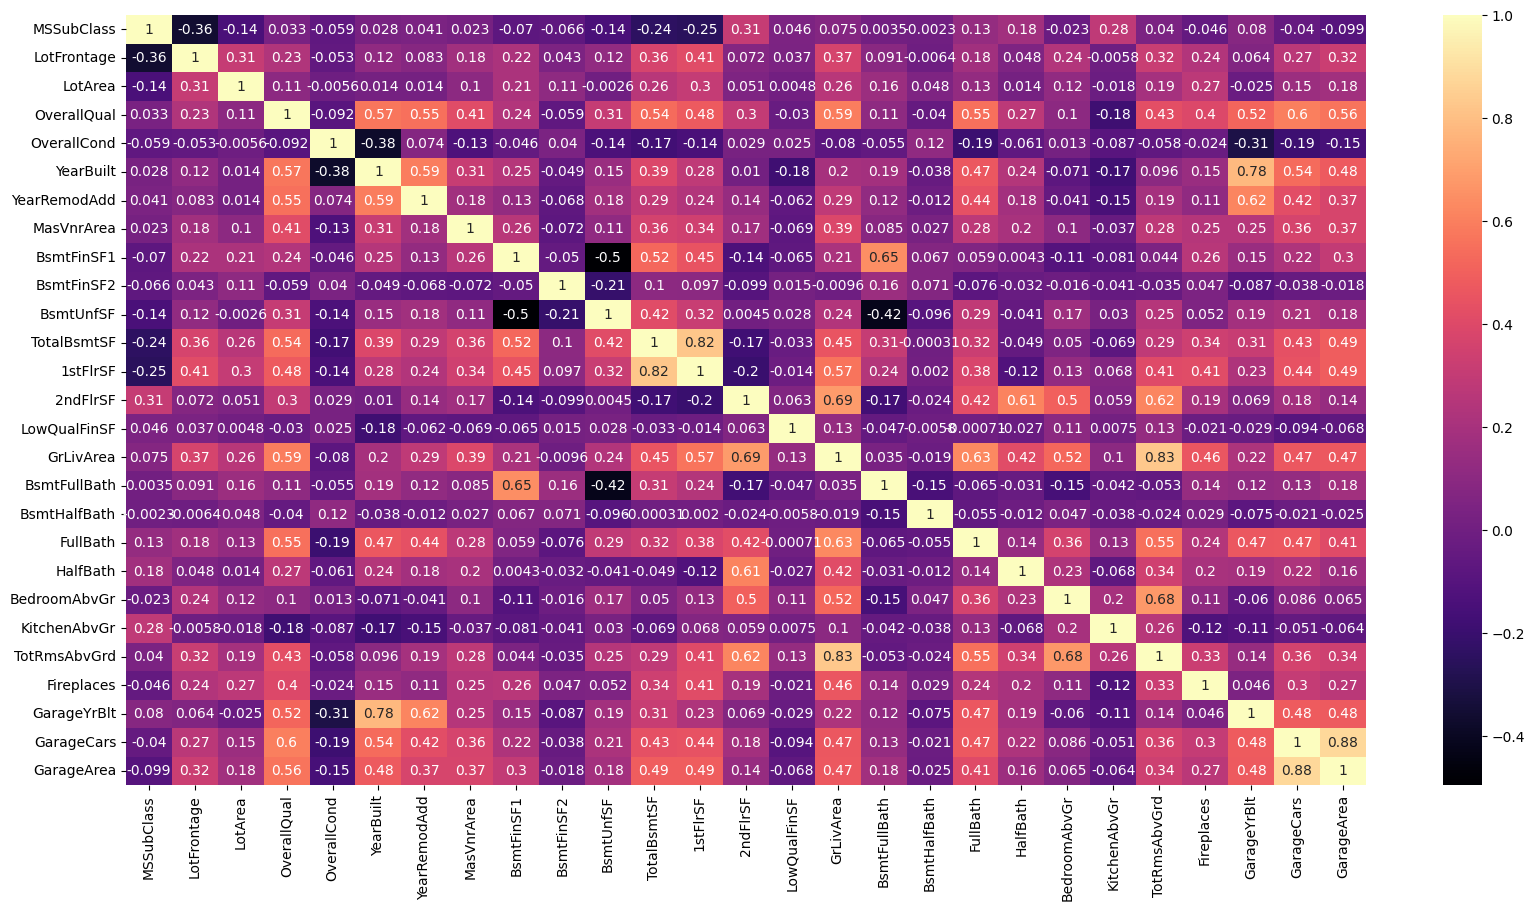

In [166]:
plt.figure(figsize=(20,10)) #w,h

corr_matrix=df[numerical_data].corr()
sns.heatmap(corr_matrix,annot=True,cmap="magma")


In [167]:
high_corr_list=['YearBuilt','TotalBsmtSF','GrLivArea','GarageCars']

In [168]:
num_df.drop(columns=high_corr_list, axis=1,inplace=True)

In [169]:
num_df.isnull().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageArea      0
dtype: int64

In [170]:
Y = df["SalePrice"]

In [171]:
model = LinearRegression()
#Using Recursive Feature Elimination I have narrowed down the top 15 features (As per their correlation coefficient with y)
rfe = RFE(estimator=model, n_features_to_select=15)
rfe.fit(num_df, Y)
rfe.ranking_

array([1, 4, 9, 1, 1, 1, 2, 5, 6, 7, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3])

In [172]:
selected_columns = [col for col, selected in zip(num_df, rfe.support_) if selected]
print(selected_columns)

['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt']


In [173]:
num_df=num_df[selected_columns]

In [174]:
num_df.head()

,MSSubClass,OverallQual,OverallCond,YearRemodAdd,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt
0,60,7,5,2003,856,854,1,0,2,1,3,1,8,0,2003.0
1,20,6,8,1976,1262,0,0,1,2,0,3,1,6,1,1976.0
2,60,7,5,2002,920,866,1,0,2,1,3,1,6,1,2001.0
3,70,7,5,1970,961,756,1,0,1,0,3,1,7,1,1998.0
4,60,8,5,2000,1145,1053,1,0,2,1,4,1,9,1,2000.0


In [175]:
encoder = OneHotEncoder(sparse_output=False, drop="first")  # sparse_output=False gives a dense NumPy array, drop=first prevent dummy variable trap

# Fit and transform the data
encoded_data = encoder.fit_transform(cat_df)
encoded_columns = encoder.get_feature_names_out(categorical_data)

categorical_encoded = pd.DataFrame(encoded_data, columns=encoded_columns)

In [176]:
categorical_encoded.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,WoodDeckSF_12,WoodDeckSF_24,WoodDeckSF_26,WoodDeckSF_28,WoodDeckSF_30,WoodDeckSF_32,WoodDeckSF_33,WoodDeckSF_35,WoodDeckSF_36,WoodDeckSF_38,WoodDeckSF_40,WoodDeckSF_42,WoodDeckSF_44,WoodDeckSF_45,WoodDeckSF_48,WoodDeckSF_49,WoodDeckSF_52,WoodDeckSF_53,WoodDeckSF_55,WoodDeckSF_56,WoodDeckSF_57,WoodDeckSF_58,WoodDeckSF_60,WoodDeckSF_63,WoodDeckSF_64,WoodDeckSF_66,WoodDeckSF_68,WoodDeckSF_70,WoodDeckSF_72,WoodDeckSF_74,WoodDeckSF_78,WoodDeckSF_80,WoodDeckSF_81,WoodDeckSF_84,WoodDeckSF_85,WoodDeckSF_86,WoodDeckSF_87,WoodDeckSF_88,WoodDeckSF_89,WoodDeckSF_90,WoodDeckSF_92,WoodDeckSF_95,WoodDeckSF_96,WoodDeckSF_97,WoodDeckSF_98,WoodDeckSF_100,WoodDeckSF_103,WoodDeckSF_104,WoodDeckSF_105,WoodDeckSF_106,WoodDeckSF_108,WoodDeckSF_110,WoodDeckSF_112,WoodDeckSF_113,WoodDeckSF_114,WoodDeckSF_115,WoodDeckSF_116,WoodDeckSF_117,WoodDeckSF_120,WoodDeckSF_121,WoodDeckSF_122,WoodDeckSF_123,WoodDeckSF_124,WoodDeckSF_125,WoodDeckSF_126,WoodDeckSF_127,WoodDeckSF_128,WoodDeckSF_132,WoodDeckSF_133,WoodDeckSF_135,WoodDeckSF_136,WoodDeckSF_138,WoodDeckSF_139,WoodDeckSF_140,WoodDeckSF_141,WoodDeckSF_142,WoodDeckSF_143,WoodDeckSF_144,WoodDeckSF_145,WoodDeckSF_146,WoodDeckSF_147,WoodDeckSF_148,WoodDeckSF_149,WoodDeckSF_150,WoodDeckSF_153,WoodDeckSF_154,WoodDeckSF_155,WoodDeckSF_156,WoodDeckSF_158,WoodDeckSF_159,WoodDeckSF_160,WoodDeckSF_161,WoodDeckSF_162,WoodDeckSF_164,WoodDeckSF_165,WoodDeckSF_166,WoodDeckSF_168,WoodDeckSF_169,WoodDeckSF_170,WoodDeckSF_171,WoodDeckSF_172,WoodDeckSF_173,WoodDeckSF_175,WoodDeckSF_176,WoodDeckSF_177,WoodDeckSF_178,WoodDeckSF_179,WoodDeckSF_180,WoodDeckSF_181,WoodDeckSF_182,WoodDeckSF_183,WoodDeckSF_184,WoodDeckSF_185,WoodDeckSF_186,WoodDeckSF_187,WoodDeckSF_188,WoodDeckSF_190,WoodDeckSF_192,WoodDeckSF_194,WoodDeckSF_195,W

In [177]:
Y = df["SalePrice"]
model = LinearRegression()
# Doing RFE for encoded categorical data
rfe = RFE(estimator=model, n_features_to_select=15, verbose=3)
rfe.fit(categorical_encoded, Y)
rfe.ranking_

Fitting estimator with 922 features.
Fitting estimator with 921 features.
Fitting estimator with 920 features.
Fitting estimator with 919 features.
Fitting estimator with 918 features.
Fitting estimator with 917 features.
Fitting estimator with 916 features.
Fitting estimator with 915 features.
Fitting estimator with 914 features.
Fitting estimator with 913 features.
Fitting estimator with 912 features.
Fitting estimator with 911 features.
Fitting estimator with 910 features.
Fitting estimator with 909 features.
Fitting estimator with 908 features.
Fitting estimator with 907 features.
Fitting estimator with 906 features.
Fitting estimator with 905 features.
Fitting estimator with 904 features.
Fitting estimator with 903 features.
Fitting estimator with 902 features.
Fitting estimator with 901 features.
Fitting estimator with 900 features.
Fitting estimator with 899 features.
Fitting estimator with 898 features.
Fitting estimator with 897 features.
Fitting estimator with 896 features.
F

array([304, 307, 310, 311, 596, 682, 141, 807, 578, 781, 579,   1, 460,
       297, 770, 728, 831, 249, 392, 499, 475, 869, 646, 166, 427, 507,
       474, 312, 627, 602, 753, 737, 100, 162, 349, 647, 601, 649, 321,
       146, 838, 870, 861, 716, 595, 864, 388, 612, 369, 346, 829, 580,
        41, 299,  38, 598, 883, 820, 502, 175, 182, 338, 380,  95, 308,
       619, 210, 384,  63,  70,  64, 488, 585,  36, 840, 511, 844, 465,
       421,  76, 203, 240, 207, 767, 147, 768, 133, 713, 887, 678, 386,
       679, 676, 631, 445, 852, 450, 477, 447, 259, 219, 806, 258, 702,
       709, 707, 455, 710, 224, 818, 796, 149, 698, 105, 108, 106, 110,
       491, 492, 878, 855, 493, 741, 469, 892, 190, 830, 762, 408, 592,
       398, 816, 827, 654, 652, 695, 655, 685, 686, 629, 118, 341, 856,
       109, 641, 717, 294, 195, 639, 484, 139, 426, 487, 836, 587, 168,
       347, 632,  34, 618, 640, 534, 145, 345, 527, 422, 804, 699, 759,
       489, 340, 764, 111,  30, 444, 526, 512, 506, 835, 424, 27

In [189]:
selected_columns = [col for col, selected in zip(categorical_encoded, rfe.support_) if selected]
selected_columns

['Utilities_NoSeWa',
 'WoodDeckSF_242',
 'WoodDeckSF_503',
 'OpenPorchSF_92',
 'OpenPorchSF_118',
 'OpenPorchSF_292',
 'OpenPorchSF_547',
 'EnclosedPorch_81',
 'EnclosedPorch_145',
 'EnclosedPorch_198',
 '3SsnPorch_96',
 'ScreenPorch_210',
 'PoolArea_480',
 'MiscVal_1150',
 'MiscVal_8300']

In [190]:
cat_df=categorical_encoded[selected_columns]

In [191]:
cat_df.head()

,Utilities_NoSeWa,WoodDeckSF_242,WoodDeckSF_503,OpenPorchSF_92,OpenPorchSF_118,OpenPorchSF_292,OpenPorchSF_547,EnclosedPorch_81,EnclosedPorch_145,EnclosedPorch_198,3SsnPorch_96,ScreenPorch_210,PoolArea_480,MiscVal_1150,MiscVal_8300
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
X=pd.concat([num_df,cat_df], axis=1)

In [193]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=100)

In [194]:
param_grid = {
    'fit_intercept': [True, False],         
    'positive': [True, False] 
}

In [197]:

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)

In [198]:
import warnings
warnings.filterwarnings('ignore')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [199]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'fit_intercept': True, 'positive': False}
Best Score: 0.7714381968882986


In [200]:
model.fit(x_train, y_train)

LinearRegression()

In [201]:
y_pred = model.predict(x_test)
print("Root Mean Squared Error (RMSE):",r2_score(y_test, y_pred))


Root Mean Squared Error (RMSE): 0.7995260427787052
